**DEEPSEEK-R1**

**DATA PREPARATION**

In [176]:
import pandas as pd

In [177]:
# Import pre-processed data
df = pd.read_csv('df1.csv')
df

,Unnamed: 0,id,quarter,speaker,position,sentence,section
0,169,170,2024Q1,Operator,Operator,we will now open the line for a question and a...,Q&A
1,170,171,2024Q1,Operator,Operator,"to ask a question , please press star one on y...",Q&A
2,171,172,2024Q1,Operator,Operator,"to withdraw your question , again press star o...",Q&A
3,172,173,2024Q1,Operator,Operator,please pick up your handset before ask your qu...,Q&A
4,173,174,2024Q1,Operator,Operator,"if you be stream today 's call , please mute y...",Q&A
...,...,...,...,...,...,...,...
1050,1910,1912,2024Q4,Mark Zuckerberg,CEO,"this year , the improvement to the business be...",Q&A
1051,1911,1913,2024Q4,Mark Zuckerberg,CEO,so the actual business opportunity for Meta AI...,Q&A
1052,1912,1914,2024Q4,Mark Zuckerberg,CEO,and I think that ’ an important thing for we t...,Q&A
1053,1913,1915,2024Q4,Mark Zuckerberg,CEO,"but nonetheless , we ’ve run a process like th...",Q&A


In [178]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df = df[~df['speaker'].isin(['Operator', 'Kenneth Dorell'])]
df  

,id,quarter,speaker,position,sentence,section
6,176,2024Q1,Eric Sheridan,Analyst,thank you so much for take the question .,Q&A
7,177,2024Q1,Eric Sheridan,Analyst,"Mark , you use the analogy of other investment...",Q&A
8,178,2024Q1,Eric Sheridan,Analyst,I know you be not give long - term guidance to...,Q&A
9,179,2024Q1,Eric Sheridan,Analyst,and you both talk about the impact AI be have ...,Q&A
10,180,2024Q1,Eric Sheridan,Analyst,what be you watch for in term of adoption or u...,Q&A
...,...,...,...,...,...,...
1049,1911,2024Q4,Mark Zuckerberg,CEO,but that do not mean that it ’s go to be a maj...,Q&A
1050,1912,2024Q4,Mark Zuckerberg,CEO,"this year , the improvement to the business be...",Q&A
1051,1913,2024Q4,Mark Zuckerberg,CEO,so the actual business opportunity for Meta AI...,Q&A
1052,1914,2024Q4,Mark Zuckerberg,CEO,and I think that ’ an important thing for we t...,Q&A


In [179]:
data = df[['id','quarter','sentence']]
data

,id,quarter,sentence
6,176,2024Q1,thank you so much for take the question .
7,177,2024Q1,"Mark , you use the analogy of other investment..."
8,178,2024Q1,I know you be not give long - term guidance to...
9,179,2024Q1,and you both talk about the impact AI be have ...
10,180,2024Q1,what be you watch for in term of adoption or u...
...,...,...,...
1049,1911,2024Q4,but that do not mean that it ’s go to be a maj...
1050,1912,2024Q4,"this year , the improvement to the business be..."
1051,1913,2024Q4,so the actual business opportunity for Meta AI...
1052,1914,2024Q4,and I think that ’ an important thing for we t...


In [180]:
# Import the human annotation data
df_human = pd.read_excel("SC - Human Annotation .xlsx")
df_human = df_human[~df_human['speaker'].isin(['Operator', 'Kenneth Dorell'])]

In [181]:
data['label'] = ''
data['label'] = df_human['label'].values
data

C:\Users\Thu\AppData\Local\Temp\ipykernel_30372\3422783698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = ''
C:\Users\Thu\AppData\Local\Temp\ipykernel_30372\3422783698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = df_human['label'].values


,id,quarter,sentence,label
6,176,2024Q1,thank you so much for take the question .,0.0
7,177,2024Q1,"Mark , you use the analogy of other investment...",0.0
8,178,2024Q1,I know you be not give long - term guidance to...,0.0
9,179,2024Q1,and you both talk about the impact AI be have ...,0.0
10,180,2024Q1,what be you watch for in term of adoption or u...,0.0
...,...,...,...,...
1049,1911,2024Q4,but that do not mean that it ’s go to be a maj...,-1.0
1050,1912,2024Q4,"this year , the improvement to the business be...",1.0
1051,1913,2024Q4,so the actual business opportunity for Meta AI...,0.0
1052,1914,2024Q4,and I think that ’ an important thing for we t...,0.0


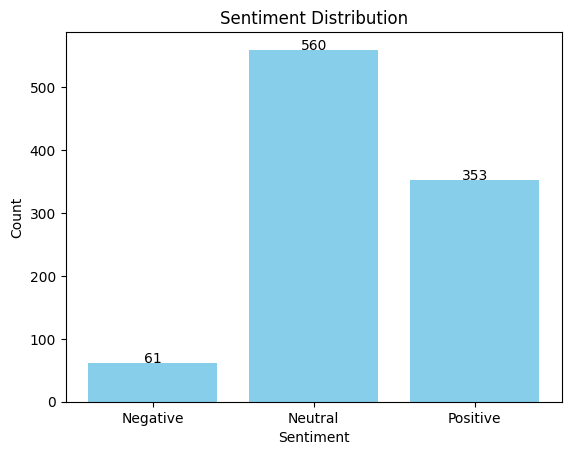

In [183]:
import matplotlib.pyplot as plt
import pandas as pd

# Example mapping
label_map = {-1.0: "Negative", 0.0: "Neutral", 1.0: "Positive"}

# Convert list of labels to Series and map
labels_named = pd.Series(data['label']).map(label_map)

# Count occurrences
counts = labels_named.value_counts()

# Reorder to Negative, Neutral, Positive
counts = counts.reindex(["Negative", "Neutral", "Positive"])

# Plot bar chart
plt.bar(counts.index, counts.values, color="skyblue")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")

# Add numbers on top
for i, v in enumerate(counts.values):
    plt.text(i, v + 0.5, str(v), ha="center")

plt.show()


In [190]:
data.groupby('quarter')['id'].nunique()

quarter
2024Q1    193
2024Q2    197
2024Q3    202
2024Q4    206
2025Q1    176
Name: id, dtype: int64

In [ ]:
# The data is imbalanced
data['label'].value_counts(normalize=True)

label
 0.0    0.574949
 1.0    0.362423
-1.0    0.062628
Name: proportion, dtype: float64

In [78]:
train_data = data[data['quarter'].isin(['2024Q1', '2024Q2', '2024Q3'])]
train_data.shape

(592, 4)

In [79]:
test_data = data.drop(train_data.index)
test_data.shape

(382, 4)

In [ ]:
# The test set is also imbalanced
test_data['label'].value_counts()

label
 0.0    238
 1.0    113
-1.0     31
Name: count, dtype: int64

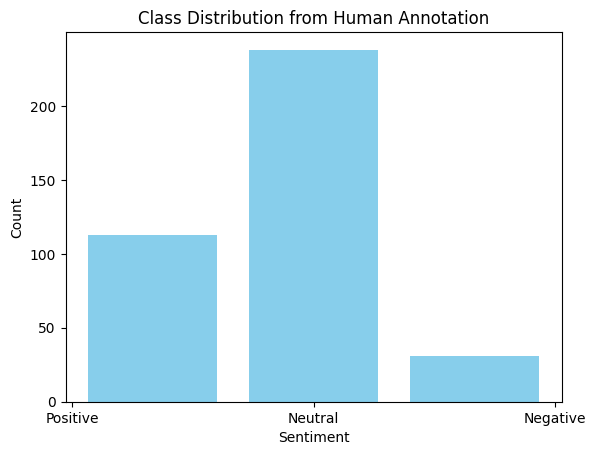

In [82]:
import matplotlib.pyplot as plt
label_map = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
labels_named = test_data['label'].map(label_map)

# Plot histogram
plt.hist(labels_named, bins=len(label_map), rwidth=0.8, color='skyblue')
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Class Distribution from Human Annotation")
plt.show()

In [208]:
test_data['label'].value_counts()

label
 0.0    238
 1.0    113
-1.0     31
Name: count, dtype: int64

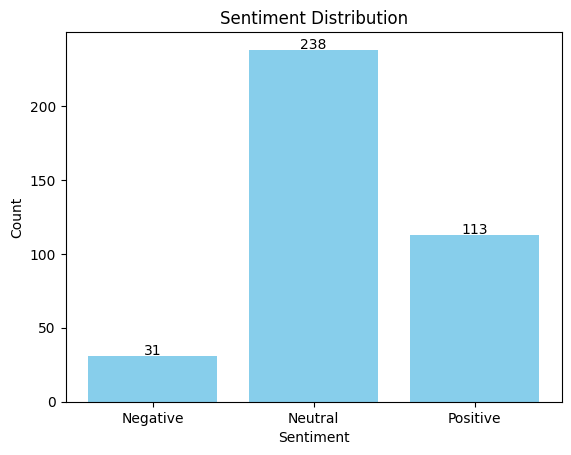

In [184]:
import matplotlib.pyplot as plt
import pandas as pd

# Example mapping
label_map = {-1.0: "Negative", 0.0: "Neutral", 1.0: "Positive"}

# Convert list of labels to Series and map
labels_named = pd.Series(test_data['label']).map(label_map)

# Count occurrences
counts = labels_named.value_counts()

# Reorder to Negative, Neutral, Positive
counts = counts.reindex(["Negative", "Neutral", "Positive"])

# Plot bar chart
plt.bar(counts.index, counts.values, color="skyblue")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")

# Add numbers on top
for i, v in enumerate(counts.values):
    plt.text(i, v + 0.5, str(v), ha="center")

plt.show()


**ZERO-SHOT PROMPT**

In [83]:
test_data['pred_label'] = ''

**Install the OpenAI Python library**

In [84]:
pip install openai

Note: you may need to restart the kernel to use updated packages.


In [85]:
from openai import OpenAI

In [86]:
import json

**Call API key**

In [155]:
client = OpenAI(api_key="sk-58c0df73519c42debe27d41e164d455a", base_url="https://api.deepseek.com")

In [88]:
batches = []
batch_size = 10

for i in range(0,len(test_data),batch_size):
    batches.append(test_data[i:i+batch_size])

**Create helper function for task**

In [89]:
def get_completion(batch,current_batch,total_batch, model='deepseek-chat'):
    print(f"Processing batch {current_batch+1} of {total_batch}")
    
    json_data = batch[['sentence','pred_label']].to_json(orient='records')
    
    zero_shot_prompt = f""" You are an advanced sentiment analysis assistant. 
    Your task is to classify sentiment and give sentiment score for each sentence extracted from an earnings call transcript as -1 for negative sentiment, 0 for neutral sentiment, 1 for positive sentiment. 
    The sentiment score should be an integer. 
    The purpose is to extract the trading sentiment so as to have an edge in after-market trading. 
    The sentences are provided between three backticks below.
    Return **only** a valid JSON code as output - which is provided between three backticks.
    Update the predicted sentiment score under the 'pred_label' in the JSON code.
    Do not make any changes to the JSON format.
    
    ```
    {json_data}
    ```
    """
    print(zero_shot_prompt)
    messages=[{"role": "user", "content": zero_shot_prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": zero_shot_prompt}],
        stream=False
    )
    return response.choices[0].message.content
    

In [90]:
batch_count = len(batches)
responses = []

for i in range(0,len(batches)):
    response = get_completion(batches[i], i, batch_count)
    responses.append(response)

Processing batch 1 of 39
 You are an advanced sentiment analysis assistant. 
    Your task is to classify sentiment and give sentiment score for each sentence extracted from an earnings call transcript as -1 for negative sentiment, 0 for neutral sentiment, 1 for positive sentiment. 
    The sentiment score should be an integer. 
    The purpose is to extract the trading sentiment so as to have an edge in after-market trading. 
    The sentences are provided between three backticks below.
    Return **only** a valid JSON code as output - which is provided between three backticks.
    Update the predicted sentiment score under the 'pred_label' in the JSON code.
    Do not make any changes to the JSON format.
    
    ```
    [{"sentence":"Mark , can you the LLM landscape continue to sort of evolve and be somewhat competitive .","pred_label":""},{"sentence":"can you sort of talk we through some of the key area of advancement you be most focused on and excited about as we sort of think abo

In [91]:
import json
import re

df_total0 = pd.DataFrame()

for response in responses: 
    cleaned = re.sub(r"^```(json)?|```$", "", response.strip()).strip()
    data = json.loads(cleaned)
    df_temp = pd.DataFrame(data)
    df_total0 = pd.concat([df_total0, df_temp], ignore_index=True)

    
print(df_total0)   

                                              sentence  pred_label
0    Mark , can you the LLM landscape continue to s...           0
1    can you sort of talk we through some of the ke...           1
2    and then the second one on Meta AI , almost 1 ...           1
3    any help on sort of how you ’re see U.S. tract...           0
4    on the Meta AI usage , I ’m not sure if we hav...          -1
..                                                 ...         ...
377  but that do not mean that it ’s go to be a maj...           0
378  this year , the improvement to the business be...           1
379  so the actual business opportunity for Meta AI...           0
380  and I think that ’ an important thing for we t...           1
381  but nonetheless , we ’ve run a process like th...           0

[382 rows x 2 columns]


In [92]:
test_data['pred_label'] = df_total0['pred_label'].values

In [93]:
test_data

,id,quarter,sentence,label,pred_label
215,575,2025Q1,"Mark , can you the LLM landscape continue to s...",1.0,0
216,576,2025Q1,can you sort of talk we through some of the ke...,1.0,1
217,577,2025Q1,"and then the second one on Meta AI , almost 1 ...",0.0,1
218,578,2025Q1,any help on sort of how you ’re see U.S. tract...,0.0,0
219,579,2025Q1,"on the Meta AI usage , I ’m not sure if we hav...",-1.0,-1
...,...,...,...,...,...
1049,1911,2024Q4,but that do not mean that it ’s go to be a maj...,-1.0,0
1050,1912,2024Q4,"this year , the improvement to the business be...",1.0,1
1051,1913,2024Q4,so the actual business opportunity for Meta AI...,0.0,0
1052,1914,2024Q4,and I think that ’ an important thing for we t...,0.0,1


In [96]:
from sklearn.metrics import confusion_matrix, f1_score,precision_score,recall_score
y_true = test_data['label']
y_pred = test_data['pred_label']

In [97]:
print(y_true.value_counts())
print(y_pred.value_counts())

label
 0.0    238
 1.0    113
-1.0     31
Name: count, dtype: int64
pred_label
 1    180
 0    160
-1     42
Name: count, dtype: int64


In [191]:
test_data

,id,quarter,sentence,label,pred_label
215,575,2025Q1,"Mark , can you the LLM landscape continue to s...",1.0,0
216,576,2025Q1,can you sort of talk we through some of the ke...,1.0,1
217,577,2025Q1,"and then the second one on Meta AI , almost 1 ...",0.0,1
218,578,2025Q1,any help on sort of how you ’re see U.S. tract...,0.0,0
219,579,2025Q1,"on the Meta AI usage , I ’m not sure if we hav...",-1.0,-1
...,...,...,...,...,...
1049,1911,2024Q4,but that do not mean that it ’s go to be a maj...,-1.0,0
1050,1912,2024Q4,"this year , the improvement to the business be...",1.0,1
1051,1913,2024Q4,so the actual business opportunity for Meta AI...,0.0,0
1052,1914,2024Q4,and I think that ’ an important thing for we t...,0.0,1


In [199]:
test_data[(test_data['label'] == 0) & (test_data['pred_label'] == 1)]

,id,quarter,sentence,label,pred_label
217,577,2025Q1,"and then the second one on Meta AI , almost 1 ...",0.0,1
222,582,2025Q1,and the reason why we want to build this out b...,0.0,1
223,583,2025Q1,"but two , we want to make sure that we can sha...",0.0,1
224,584,2025Q1,"so to that end , Llama 4 , the shape of the mo...",0.0,1
230,590,2025Q1,and part of the reason why we think that that ...,0.0,1
...,...,...,...,...,...
1034,1896,2024Q4,but I think that the direction that it ’s go b...,0.0,1
1038,1900,2024Q4,it sort of will feel in some way like the curr...,0.0,1
1042,1904,2024Q4,we try to scale they to reach usually a billio...,0.0,1
1043,1905,2024Q4,and it ’ at that point once they ’re at scale ...,0.0,1


In [98]:
from sklearn.metrics import classification_report
report = classification_report(y_true,y_pred,labels = [-1,0,1],target_names=['negative','neutral','positive'],output_dict=True)
df_report = pd.DataFrame(report).transpose
df_report

<bound method DataFrame.transpose of             negative     neutral    positive  accuracy   macro avg  \
precision   0.476190    0.843750    0.544444  0.662304    0.621462   
recall      0.645161    0.567227    0.867257  0.662304    0.693215   
f1-score    0.547945    0.678392    0.668942  0.662304    0.631760   
support    31.000000  238.000000  113.000000  0.662304  382.000000   

           weighted avg  
precision      0.725384  
recall         0.662304  
f1-score       0.665011  
support      382.000000  >

In [99]:
cm=confusion_matrix(y_true,y_pred,labels=[-1,0,1,])
cm_df = pd.DataFrame(cm,index=['negative','neutral','positive'],columns=['negative','neutral','positive'])
cm_df

,negative,neutral,positive
negative,20,11,0
neutral,21,135,82
positive,1,14,98


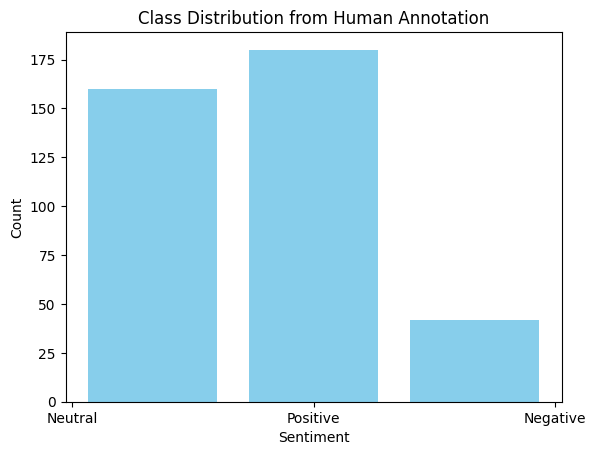

In [100]:
import matplotlib.pyplot as plt
label_map = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
labels_named = test_data['pred_label'].map(label_map)

# Plot histogram
plt.hist(labels_named, bins=len(label_map), rwidth=0.8, color='skyblue')
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Class Distribution from Human Annotation")
plt.show()

**ZERO-SHOT PROMPT FOR 200 EXAMPLES**

In [156]:
test_data_0 = test_data.sample(n=200,random_state=42)
test_data_0['pred_label'] = ''

In [157]:
batches = []
batch_size = 10

for i in range(0,len(test_data_0),batch_size):
    batches.append(test_data_0[i:i+batch_size])

In [158]:
def get_completion(batch,current_batch,total_batch, model='deepseek-chat'):
    print(f"Processing batch {current_batch+1} of {total_batch}")
    
    json_data = batch[['sentence','pred_label']].to_json(orient='records')
    
    zero_shot_prompt = f""" You are an advanced sentiment analysis assistant. 
    Your task is to classify sentiment and give sentiment score for each sentence extracted from an earnings call transcript as -1 for negative sentiment, 0 for neutral sentiment, 1 for positive sentiment. 
    The sentiment score should be an integer. 
    The purpose is to extract the trading sentiment so as to have an edge in after-market trading. 
    The sentences are provided between three backticks below.
    Return **only** a valid JSON code as output - which is provided between three backticks.
    Update the predicted sentiment score under the 'pred_label' in the JSON code.
    Do not make any changes to the JSON format.
    
    ```
    {json_data}
    ```
    """
    print(zero_shot_prompt)
    messages=[{"role": "user", "content": zero_shot_prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": zero_shot_prompt}],
        stream=False
    )
    return response.choices[0].message.content
    

In [159]:
batch_count = len(batches)
responses = []

for i in range(0,len(batches)):
    response = get_completion(batches[i], i, batch_count)
    responses.append(response)

Processing batch 1 of 20
 You are an advanced sentiment analysis assistant. 
    Your task is to classify sentiment and give sentiment score for each sentence extracted from an earnings call transcript as -1 for negative sentiment, 0 for neutral sentiment, 1 for positive sentiment. 
    The sentiment score should be an integer. 
    The purpose is to extract the trading sentiment so as to have an edge in after-market trading. 
    The sentences are provided between three backticks below.
    Return **only** a valid JSON code as output - which is provided between three backticks.
    Update the predicted sentiment score under the 'pred_label' in the JSON code.
    Do not make any changes to the JSON format.
    
    ```
    [{"sentence":"I think there \u2019 a number of novel thing that they do that I think we \u2019re still digest .","pred_label":""},{"sentence":"and part of what I think be kind of important to think about here when we think about price growth be , we really the averag

In [160]:
import re
import json

df_total0_1 = pd.DataFrame()

for response in responses: 
    cleaned = re.sub(r"^```(json)?|```$", "", response.strip()).strip()
    data = json.loads(cleaned)
    df_temp = pd.DataFrame(data)
    df_total0_1 = pd.concat([df_total0_1, df_temp], ignore_index=True)

    
print(df_total0_1)   

                                              sentence  pred_label
0    I think there ’ a number of novel thing that t...           0
1    and part of what I think be kind of important ...           0
2    I think what we see here be as Llama become mo...           1
3    and on Facebook , which be the second large dr...           1
4    your second question be about why we ’re inves...           0
..                                                 ...         ...
195  some of the task might be pretty simple for pe...           0
196  we ’re also find more way that it ’ useful to ...           1
197  we ’ll continue ramp adoption for those worklo...           0
198  so we feel good about how the prior investment...           1
199  just any learning on the difference between yo...           0

[200 rows x 2 columns]


In [161]:
test_data_0['pred_label'] = df_total0_1['pred_label'].values

In [162]:
y_true = test_data_0['label']
y_pred = test_data_0['pred_label']

In [163]:
print(y_true.value_counts())
print(y_pred.value_counts())

label
 0.0    126
 1.0     59
-1.0     15
Name: count, dtype: int64
pred_label
 1    100
 0     77
-1     23
Name: count, dtype: int64


In [164]:
from sklearn.metrics import classification_report
report = classification_report(y_true,y_pred,labels = [-1,0,1,],target_names=['negative','neutral','positive'],output_dict=True)
df_report = pd.DataFrame(report).transpose
df_report

<bound method DataFrame.transpose of             negative     neutral   positive  accuracy   macro avg  \
precision   0.478261    0.844156   0.510000     0.635    0.610806   
recall      0.733333    0.515873   0.864407     0.635    0.704538   
f1-score    0.578947    0.640394   0.641509     0.635    0.620284   
support    15.000000  126.000000  59.000000     0.635  200.000000   

           weighted avg  
precision      0.718138  
recall         0.635000  
f1-score       0.636115  
support      200.000000  >

In [165]:
cm=confusion_matrix(y_true,y_pred,labels=[-1,0,1,])
cm_df = pd.DataFrame(cm,index=['negative','neutral','positive'],columns=['negative','neutral','positive'])
cm_df

,negative,neutral,positive
negative,11,4,0
neutral,12,65,49
positive,0,8,51


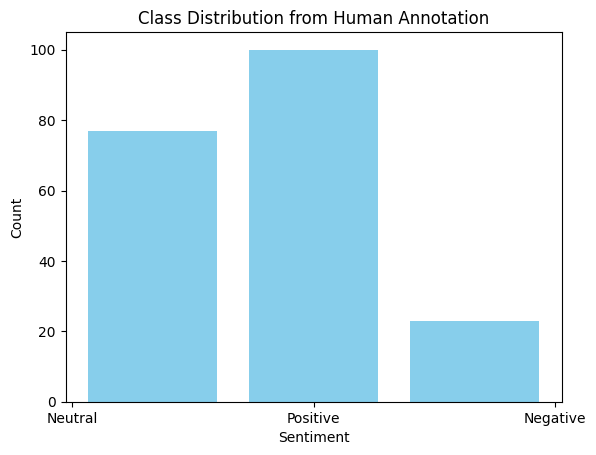

In [171]:
import matplotlib.pyplot as plt
label_map = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
labels_named = test_data_0['pred_label'].map(label_map)

# Plot histogram
plt.hist(labels_named, bins=len(label_map), rwidth=0.8, color='skyblue')
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Class Distribution from Human Annotation")
plt.show()

**FEW_SHOT PROMPTING**

**3-shot prompting**

In [101]:
test_data_1 = test_data.sample(n=200,random_state=42)
test_data_1['pred_label_3_shot'] = ''

In [103]:
batches = []
batch_size = 10

for i in range(0,len(test_data_1),batch_size):
    batches.append(test_data_1[i:i+batch_size])

**This time, 3 short examples - one from each class, are provided in the prompt. The examples were extracted from the training set**

In [ ]:
def get_completion(batch,current_batch,total_batch, model='deepseek-chat'):
    print(f"Processing batch {current_batch+1} of {total_batch}")
    
    json_data = batch[['sentence','pred_label_3_shot']].to_json(orient='records')
    
    three_shot_prompt = f"""You are an advanced sentiment analysis assistant. 
    Your task if to classify each sentence’s sentiment from earnings call transcripts as:
   -1 for negative
    0 for neutral
    1 for positive
    The purpose is to extract the trading sentiment so as to have an edge in after-market trading.
    Return **only** a valid JSON containing the sentences with an updated 'pred_label_3_shot' sentiment score as integer.
    The sentences are provided between three backticks below.
    Examples of good sentiment classification are given between separator ####.
    Remember that these examples are for reference only and should not be included in the output. 
    
    
    ```
    {json_data}
    ```
    ####
    Text: Shops ads revenue is growing at a strong year-over-year pace.
    Sentiment score: 1.0 (positive)
    Text: So Llama is the foundation model that people can shape into all kind of different products.
    Sentiment score: 0.0 (neutral)
    Text: We don't expect our gen AI products to be a meaningful driver of revenue in '24.
    Sentiment score: -1.0 (negative)
    ####
    
    """

    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": three_shot_prompt}],
        stream=False
    )
    return response.choices[0].message.content
    

In [105]:
batch_count = len(batches)
responses = []

for i in range(0,len(batches)):
    response = get_completion(batches[i], i, batch_count)
    responses.append(response)

Processing batch 1 of 20
Processing batch 2 of 20
Processing batch 3 of 20
Processing batch 4 of 20
Processing batch 5 of 20
Processing batch 6 of 20
Processing batch 7 of 20
Processing batch 8 of 20
Processing batch 9 of 20
Processing batch 10 of 20
Processing batch 11 of 20
Processing batch 12 of 20
Processing batch 13 of 20
Processing batch 14 of 20
Processing batch 15 of 20
Processing batch 16 of 20
Processing batch 17 of 20
Processing batch 18 of 20
Processing batch 19 of 20
Processing batch 20 of 20


In [106]:
import json
import re

df_total1 = pd.DataFrame()

for response in responses: 
    cleaned = re.sub(r"^```(json)?|```$", "", response.strip()).strip()
    data = json.loads(cleaned)
    df_temp = pd.DataFrame(data)
    df_total1 = pd.concat([df_total1, df_temp], ignore_index=True)

    
print(df_total1)  

                                              sentence  pred_label_3_shot
0    I think there ’ a number of novel thing that t...                  0
1    and part of what I think be kind of important ...                  0
2    I think what we see here be as Llama become mo...                  1
3    and on Facebook , which be the second large dr...                  1
4    your second question be about why we ’re inves...                  0
..                                                 ...                ...
195  some of the task might be pretty simple for pe...                  0
196  we ’re also find more way that it ’ useful to ...                  1
197  we ’ll continue ramp adoption for those worklo...                  0
198  so we feel good about how the prior investment...                  1
199  just any learning on the difference between yo...                  0

[200 rows x 2 columns]


In [107]:
test_data_1['pred_label_3_shot'] = df_total1['pred_label_3_shot'].values

In [108]:
from sklearn.metrics import confusion_matrix, f1_score
y_true = test_data_1['label']
y_pred = test_data_1['pred_label_3_shot']

In [109]:
print(y_true.value_counts())
print(y_pred.value_counts())

label
 0.0    126
 1.0     59
-1.0     15
Name: count, dtype: int64
pred_label_3_shot
 1    92
 0    84
-1    24
Name: count, dtype: int64


In [110]:
from sklearn.metrics import classification_report
report = classification_report(y_true,y_pred,labels = [-1,0,1],target_names=['negative','neutral','positive'],output_dict=True)
df_report = pd.DataFrame(report).transpose
df_report

<bound method DataFrame.transpose of             negative     neutral   positive  accuracy   macro avg  \
precision   0.458333    0.857143   0.554348      0.67    0.623275   
recall      0.733333    0.571429   0.864407      0.67    0.723056   
f1-score    0.564103    0.685714   0.675497      0.67    0.641771   
support    15.000000  126.000000  59.000000      0.67  200.000000   

           weighted avg  
precision      0.737908  
recall         0.670000  
f1-score       0.673579  
support      200.000000  >

In [111]:
cm=confusion_matrix(y_true,y_pred,labels=[-1,0,1,])
cm_df = pd.DataFrame(cm,index=['negative','neutral','positive'],columns=['negative','neutral','positive'])
cm_df

,negative,neutral,positive
negative,11,4,0
neutral,13,72,41
positive,0,8,51


**6-SHOT PROMPT**

In [112]:
test_data_2= test_data.sample(n=200,random_state=42)
test_data_2['pred_label_6_shot'] = ''

In [200]:
test_data_2

,id,quarter,sentence,label,pred_label,pred_label_6_shot
948,1810,2024Q4,I think there ’ a number of novel thing that t...,0.0,0,0
914,1776,2024Q4,and part of what I think be kind of important ...,0.0,0,0
883,1745,2024Q4,I think what we see here be as Llama become mo...,1.0,1,1
996,1858,2024Q4,"and on Facebook , which be the second large dr...",1.0,1,1
273,633,2025Q1,your second question be about why we ’re inves...,0.0,0,0
...,...,...,...,...,...,...
1035,1897,2024Q4,some of the task might be pretty simple for pe...,0.0,0,0
849,1711,2024Q4,we ’re also find more way that it ’ useful to ...,1.0,1,1
872,1734,2024Q4,we ’ll continue ramp adoption for those worklo...,0.0,1,0
332,692,2025Q1,so we feel good about how the prior investment...,1.0,1,1


In [113]:
batches = []
batch_size = 10

for i in range(0,len(test_data_2),batch_size):
    batches.append(test_data_2[i:i+batch_size])

**6 longer examples are provided - 2 from each sentiment class**

In [114]:
def get_completion(batch,current_batch,total_batch, model='deepseek-chat'):
    print(f"Processing batch {current_batch+1} of {total_batch}")
    
    json_data = batch[['sentence','pred_label_6_shot']].to_json(orient='records')
    
    six_shot_prompt = f""" You are an advanced sentiment analysis assistant. 
    Your task if to classify each sentence’s sentiment from earnings call transcripts as:
   -1 for negative
    0 for neutral
    1 for positive
    The purpose is to extract the trading sentiment so as to have an edge in after-market trading.
    Return **only** a valid JSON containing the sentences with an updated 'pred_label_6_shot' sentiment score as integer.
    The sentences are provided between three backticks below.
    Examples of good sentiment classification are given between separator ####.
    Remember that these examples are for reference only and should not be included in the output.
    
    ```
    {json_data}
    ```
    ####
    Text: On the end-to-end automation products like Advantage+ Shopping and Advantage+ App Campaigns, we're also seeing very strong growth.
    Sentiment score: 1.0 (positive)
    Text: Llama is sort of like the engine that powers the product and it's open source, and I'm just excited about the progress that we're making on both of those. 
    Sentiment score: 1.0 (positive)
    Text: I wanted to hear your thoughts on how this product evolves over time, specifically from a monetization perspective, but also next steps on users? 
    Sentiment score: 0.0 (neutral)
    Text: So we're being very disciplined with allocation of new resources. 
    Sentiment score: 0.0 (neutral)
    Text: And we also expect modestly larger FX headwinds in Q3 based on current rates. 
    Sentiment score: -1.0 (negative)
    Text: And given the nature of capital expenditures, generally, there is some actually quite a bit of lumpiness quarter-to-quarter. 
    Sentiment score: -1.0 (negative)
    ####
    
    """
  
    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": six_shot_prompt}],
        stream=False
    )
    return response.choices[0].message.content
    

In [117]:
batch_count = len(batches)
responses = []

for i in range(0,len(batches)):
    response = get_completion(batches[i], i, batch_count)
    responses.append(response)

Processing batch 1 of 20
Processing batch 2 of 20
Processing batch 3 of 20
Processing batch 4 of 20
Processing batch 5 of 20
Processing batch 6 of 20
Processing batch 7 of 20
Processing batch 8 of 20
Processing batch 9 of 20
Processing batch 10 of 20
Processing batch 11 of 20
Processing batch 12 of 20
Processing batch 13 of 20
Processing batch 14 of 20
Processing batch 15 of 20
Processing batch 16 of 20
Processing batch 17 of 20
Processing batch 18 of 20
Processing batch 19 of 20
Processing batch 20 of 20


In [118]:
import json
import re

df_total2 = pd.DataFrame()

for response in responses: 
    cleaned = re.sub(r"^```(json)?|```$", "", response.strip()).strip()
    data = json.loads(cleaned)
    df_temp = pd.DataFrame(data)
    df_total2 = pd.concat([df_total2, df_temp], ignore_index=True)

    
print(df_total2)  

                                              sentence  pred_label_6_shot
0    I think there ’ a number of novel thing that t...                  0
1    and part of what I think be kind of important ...                  0
2    I think what we see here be as Llama become mo...                  1
3    and on Facebook , which be the second large dr...                  1
4    your second question be about why we ’re inves...                  0
..                                                 ...                ...
195  some of the task might be pretty simple for pe...                  0
196  we ’re also find more way that it ’ useful to ...                  1
197  we ’ll continue ramp adoption for those worklo...                  0
198  so we feel good about how the prior investment...                  1
199  just any learning on the difference between yo...                  0

[200 rows x 2 columns]


In [119]:
df_total2

,sentence,pred_label_6_shot
0,I think there ’ a number of novel thing that t...,0
1,and part of what I think be kind of important ...,0
2,I think what we see here be as Llama become mo...,1
3,"and on Facebook , which be the second large dr...",1
4,your second question be about why we ’re inves...,0
...,...,...
195,some of the task might be pretty simple for pe...,0
196,we ’re also find more way that it ’ useful to ...,1
197,we ’ll continue ramp adoption for those worklo...,0
198,so we feel good about how the prior investment...,1


In [120]:
test_data_2['pred_label_6_shot'] = df_total2['pred_label_6_shot'].values

In [121]:
from sklearn.metrics import confusion_matrix, f1_score
y_true = test_data_2['label']
y_pred = test_data_2['pred_label_6_shot']

In [122]:
print(y_true.value_counts())
print(y_pred.value_counts())

label
 0.0    126
 1.0     59
-1.0     15
Name: count, dtype: int64
pred_label_6_shot
 0    88
 1    88
-1    24
Name: count, dtype: int64


In [123]:
from sklearn.metrics import classification_report
report = classification_report(y_true,y_pred,labels = [-1,0,1,],target_names=['negative','neutral','positive'],output_dict=True)
df_report = pd.DataFrame(report).transpose

In [124]:
print(df_report)

<bound method DataFrame.transpose of             negative     neutral   positive  accuracy   macro avg  \
precision   0.416667    0.840909   0.556818     0.665    0.604798   
recall      0.666667    0.587302   0.830508     0.665    0.694826   
f1-score    0.512821    0.691589   0.666667     0.665    0.623692   
support    15.000000  126.000000  59.000000     0.665  200.000000   

           weighted avg  
precision      0.725284  
recall         0.665000  
f1-score       0.670829  
support      200.000000  >


In [125]:
cm=confusion_matrix(y_true,y_pred,labels=[-1,0,1,])
cm_df = pd.DataFrame(cm,index=['negative','neutral','positive'],columns=['negative','neutral','positive'])

In [126]:
cm_df

,negative,neutral,positive
negative,10,5,0
neutral,13,74,39
positive,1,9,49
